### Rotational mass in Nordic system

#### Have a look at Nordic energy mix

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler

NORDIC_NODES = ['NO1', 'NO2', 'NO3', 'NO4', 'NO5', 'Denmark', 'Sweden', 'Finland']

df_gen = pd.read_csv(f'new_longer_dist_base/results_output_gen.csv')
df_nordic_gen = df_gen[df_gen["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_nordic_gen

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,Denmark,Coalexisting,2020-2025,0.000000,3165.000000,0.547816,0.000000,15188.429858
1,Denmark,Coalexisting,2025-2030,0.000000,1947.692308,0.573191,0.000000,9779.658615
2,Denmark,Coalexisting,2030-2035,0.000000,1308.605769,0.395196,0.000000,4530.285852
3,Denmark,Coalexisting,2035-2040,0.000000,912.980769,0.028778,0.000000,230.154942
4,Denmark,Coalexisting,2040-2045,0.000000,633.000000,0.000424,0.000000,2.353511
...,...,...,...,...,...,...,...,...
1115,NO5,Nuclear,2035-2040,0.001702,0.002427,0.605846,5232.963635,0.012883
1116,NO5,Nuclear,2040-2045,0.000026,0.002453,0.474018,54.807433,0.010188
1117,NO5,Nuclear,2045-2050,0.000817,0.003271,0.474864,1117.592892,0.013605
1118,NO5,Nuclear,2050-2055,0.000246,0.003516,0.441704,194.373699,0.013605


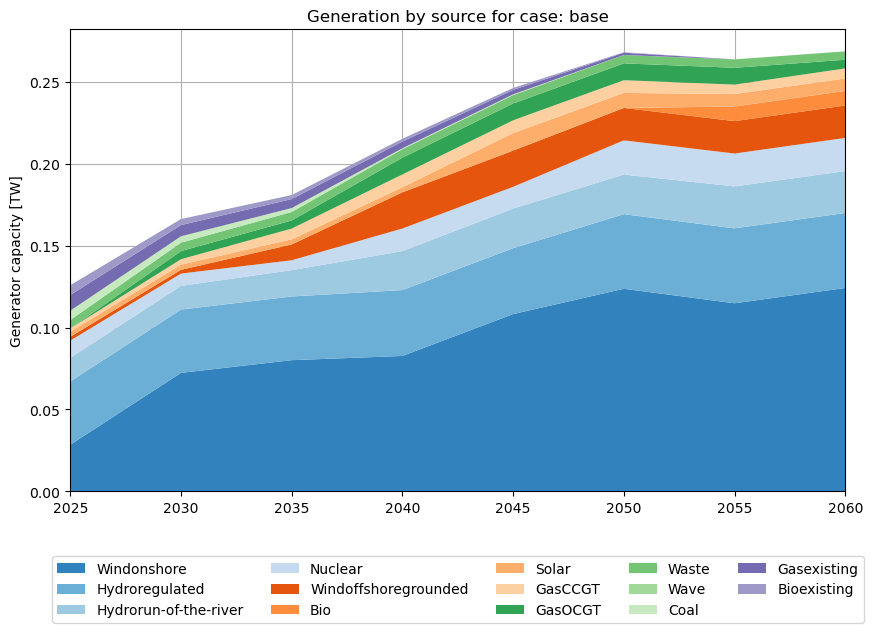

In [58]:
def plot_gen_by_source(case, _df):
    df_gen_source = _df.copy()
    df_gen_source["genInstalledCap_MW"] = df_gen_source.groupby(['GeneratorType', 'Period'])['genInstalledCap_MW'].transform('sum')
    df_gen_source = df_gen_source.drop_duplicates(("GeneratorType", "Period"), ignore_index=True)[["GeneratorType", "Period", "genInstalledCap_MW"]]

    periods = list(df_gen_source["Period"].unique())

    gen_source_sorted_by_cap = list(df_gen_source[df_gen_source["Period"] == "2055-2060"]\
                              .sort_values(by="genInstalledCap_MW", ascending=False)["GeneratorType"].values)
    
    gen_source_displayed = gen_source_sorted_by_cap

    installed_caps_gen = []
    for gen_source in gen_source_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df_gen_source[(df_gen_source["GeneratorType"] == gen_source) & (df_gen_source["Period"] == period)]["genInstalledCap_MW"].values[0])

        # Remove gen_source that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            gen_source_displayed.remove(gen_source)
        else:
            installed_caps_gen.append(cap_by_period)

    installed_caps_gen_TW = [[cap/1000000 for cap in sublist] for sublist in installed_caps_gen]
    period_displayed_gen = [period.split("-")[1] for period in periods]

    plt.rcParams.update({'font.size': 10})
    plt.rcParams['axes.prop_cycle'] = cycler('color', [*plt.get_cmap('tab20c').colors, *plt.get_cmap('tab20b').colors])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.stackplot(period_displayed_gen, installed_caps_gen_TW, labels=gen_source_displayed)
    plt.ylabel('Generator capacity [TW]')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)
    plt.title(f"Generation by source for case: {case}")
    plt.show()

plot_gen_by_source("base", df_nordic_gen)

Operational data set to calculate rotational mass

In [50]:
df_rotm = pd.read_csv("new_longer_dist_base/results_output_Operational.csv")
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,scenario1,winter,1,9641.590167,-11177.375732,-9.641590e+03,0.0,0.0,...,-0.001059,0.002016,62352.001989,-0.000129,-12.780586,1596.458964,-47.893769,1.958747e-07,64.589609,0.166828
1,Austria,2020-2025,scenario1,winter,2,9576.105993,-11111.338495,-9.576106e+03,0.0,0.0,...,-0.001082,0.001910,62352.001029,-0.000132,-13.375955,1596.502711,-47.895081,1.958688e-07,64.589612,0.167969
2,Austria,2020-2025,scenario1,winter,3,9399.078362,-11139.745250,-9.399078e+03,0.0,0.0,...,-0.001088,0.001872,62352.000111,-0.000133,-13.707304,1808.632380,-54.258971,1.958610e-07,64.589613,0.171132
3,Austria,2020-2025,scenario1,winter,4,9254.228215,-11254.475633,-9.254228e+03,0.0,0.0,...,-0.001087,0.001864,62351.999201,-0.000134,-19.413416,2082.123770,-62.463713,1.958544e-07,64.589615,0.173811
4,Austria,2020-2025,scenario1,winter,5,9446.536356,-11839.083746,-9.446536e+03,0.0,0.0,...,-0.001087,0.001839,62351.998315,-0.000134,-67.249114,2535.871908,-76.076157,1.958482e-07,64.589616,0.170272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192315,EnergyhubCentral,2055-2060,scenario3,peak2,716,0.000000,-0.000000,-2.349339e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,0.070655,0.000000
1192316,EnergyhubCentral,2055-2060,scenario3,peak2,717,0.000000,-0.000000,-2.391653e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,0.070570,0.000000
1192317,EnergyhubCentral,2055-2060,scenario3,peak2,718,0.000000,-0.000000,-2.389389e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,0.070425,0.000000
1192318,EnergyhubCentral,2055-2060,scenario3,peak2,719,0.000000,-0.000000,-2.421459e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,0.068887,0.000000


Choose only one scenario for insight 

In [51]:
df_rotm = df_rotm[df_rotm["Scenario"] == "scenario1"]
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,scenario1,winter,1,9641.590167,-11177.375732,-9.641590e+03,0.0,0.0,...,-0.001059,0.002016,62352.001989,-0.000129,-12.780586,1596.458964,-47.893769,1.958747e-07,64.589609,0.166828
1,Austria,2020-2025,scenario1,winter,2,9576.105993,-11111.338495,-9.576106e+03,0.0,0.0,...,-0.001082,0.001910,62352.001029,-0.000132,-13.375955,1596.502711,-47.895081,1.958688e-07,64.589612,0.167969
2,Austria,2020-2025,scenario1,winter,3,9399.078362,-11139.745250,-9.399078e+03,0.0,0.0,...,-0.001088,0.001872,62352.000111,-0.000133,-13.707304,1808.632380,-54.258971,1.958610e-07,64.589613,0.171132
3,Austria,2020-2025,scenario1,winter,4,9254.228215,-11254.475633,-9.254228e+03,0.0,0.0,...,-0.001087,0.001864,62351.999201,-0.000134,-19.413416,2082.123770,-62.463713,1.958544e-07,64.589615,0.173811
4,Austria,2020-2025,scenario1,winter,5,9446.536356,-11839.083746,-9.446536e+03,0.0,0.0,...,-0.001087,0.001839,62351.998315,-0.000134,-67.249114,2535.871908,-76.076157,1.958482e-07,64.589616,0.170272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190875,EnergyhubCentral,2055-2060,scenario1,peak2,716,0.000000,-0.000000,-2.432384e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,24.428123,0.000000
1190876,EnergyhubCentral,2055-2060,scenario1,peak2,717,0.000000,-0.000000,-2.351885e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,24.428273,0.000000
1190877,EnergyhubCentral,2055-2060,scenario1,peak2,718,0.000000,-0.000000,-2.234486e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,24.428297,0.000000
1190878,EnergyhubCentral,2055-2060,scenario1,peak2,719,0.000000,-0.000000,-2.312177e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-8897.605425,9172.789098,-275.183673,0.000000e+00,24.428298,0.000000


Filter by Nordic markets

In [52]:
df_rotm = df_rotm[df_rotm["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Denmark,2020-2025,scenario1,winter,1,5020.873702,-6554.139072,-5020.873702,0.0,0.0,...,-0.000870,0.000795,0.003153,-0.000087,-0.009979,1580.696313,-47.420889,1.957089e-07,62.651948,0.566380
1,Denmark,2020-2025,scenario1,winter,2,4925.326413,-6460.899460,-4925.326413,0.0,0.0,...,-0.000872,0.000793,0.003145,-0.000087,-0.010027,1583.075415,-47.492262,1.956986e-07,62.651948,0.577486
2,Denmark,2020-2025,scenario1,winter,3,4906.868848,-6353.076789,-4906.868847,0.0,0.0,...,-0.000872,0.000793,0.003137,-0.000087,-0.010075,1490.946491,-44.728395,1.956890e-07,62.651948,0.579486
3,Denmark,2020-2025,scenario1,winter,4,5002.702009,-6489.921061,-5002.702009,0.0,0.0,...,-0.000871,0.000794,0.003127,-0.000087,-0.010060,1533.225967,-45.996779,1.956823e-07,62.651954,0.570735
4,Denmark,2020-2025,scenario1,winter,5,5190.890490,-7163.894867,-5190.890490,0.0,0.0,...,-0.000867,0.000797,0.003110,-0.000087,-0.010066,2034.035580,-61.021067,1.956781e-07,62.652050,0.557107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46075,Sweden,2055-2060,scenario1,peak2,716,29787.731900,-30754.754022,-29787.731900,0.0,0.0,...,-0.037418,0.034399,1099.766001,-0.004892,-1642.498555,2690.230600,-80.706918,1.402033e-05,24.428517,0.057636
46076,Sweden,2055-2060,scenario1,peak2,717,29330.578953,-30562.493894,-29330.578952,0.0,0.0,...,-0.037752,0.034096,1099.764729,-0.004928,-1404.884140,2718.353324,-81.550600,1.402024e-05,24.428518,0.058535
46077,Sweden,2055-2060,scenario1,peak2,718,29277.665398,-30557.344069,-29277.665397,0.0,0.0,...,-0.037944,0.033909,1099.763810,-0.004953,-1303.747621,2663.330220,-79.899907,1.402024e-05,24.428510,0.058640
46078,Sweden,2055-2060,scenario1,peak2,719,29393.005292,-31019.111697,-29393.005291,0.0,0.0,...,-0.038573,0.032505,1099.764870,-0.005008,-1415.381808,3135.561101,-94.066833,1.401935e-05,24.428551,0.058410


Sum by rotational mass tech

* Inertia constants from https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2502905/18326_FULLTEXT.pdf?sequence=1 (p.16)
* Formula from https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/utvikling-av-kraftsystemet/nordisk-frekvensstabilitet/future-system-inertia-phase-2.pdf (p.16)
* Assume all hydro conventional

In [53]:
#ROT_MASS_TECHS = ['Nuclear_MW', 'Hydrorun-of-the-river_MW', 'Hydroregulated_MW', 'Wave_MW']
ROT_MASS_TECHS = {
    "Nuclear_MW": 6.3,
    "Hydroregulated_MW": 3, 
    "Hydrorun-of-the-river_MW": 3,
}

OTHER_THERMAL_TECHS = ['Liginiteexisting_MW', 'Lignite_MW', 'LigniteCCSadv_MW',
       'Coalexisting_MW', 'Coal_MW', 'CoalCCSadv_MW', 'Gasexisting_MW',
       'GasOCGT_MW', 'GasCCGT_MW', 'GasCCSadv_MW', 'Oilexisting_MW',
       'Bioexisting_MW', 'Bio10cofiring_MW', 'Geo_MW', 'Bio_MW', 'Bio10cofiringCCS_MW',
        'LigniteCCSsup_MW', 'CoalCCS_MW', 'GasCCS_MW', 'Waste_MW']

for tech in OTHER_THERMAL_TECHS:
    ROT_MASS_TECHS[tech] = 4

ROT_MASS_TECHS

{'Nuclear_MW': 6.3,
 'Hydroregulated_MW': 3,
 'Hydrorun-of-the-river_MW': 3,
 'Liginiteexisting_MW': 4,
 'Lignite_MW': 4,
 'LigniteCCSadv_MW': 4,
 'Coalexisting_MW': 4,
 'Coal_MW': 4,
 'CoalCCSadv_MW': 4,
 'Gasexisting_MW': 4,
 'GasOCGT_MW': 4,
 'GasCCGT_MW': 4,
 'GasCCSadv_MW': 4,
 'Oilexisting_MW': 4,
 'Bioexisting_MW': 4,
 'Bio10cofiring_MW': 4,
 'Geo_MW': 4,
 'Bio_MW': 4,
 'Bio10cofiringCCS_MW': 4,
 'LigniteCCSsup_MW': 4,
 'CoalCCS_MW': 4,
 'GasCCS_MW': 4,
 'Waste_MW': 4}

Text(0, 0.5, 'Inertia (GWs)')

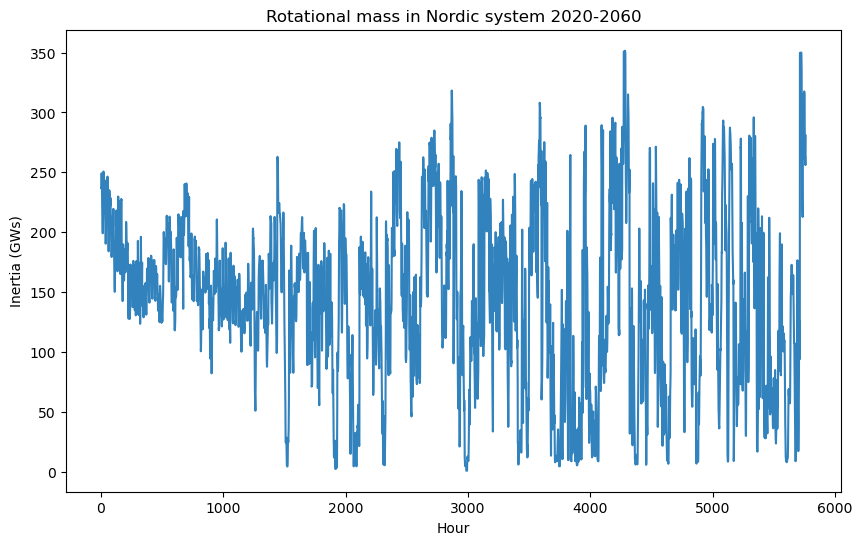

In [60]:
def calc_rot_mass_GWs(df_row):
    rot_mass_MWs = 0
    for tech, inertia_const in ROT_MASS_TECHS.items():
        rot_mass_MWs += df_row[tech] * inertia_const
    return rot_mass_MWs / 1000

df_rotm["Rotational mass GWs"] = df_rotm.apply(lambda row: calc_rot_mass_GWs(row), axis=1)

rot_mass_GW_by_hour = list(df_rotm.groupby(by=["Period", "Hour"])["Rotational mass GWs"].sum())
hours = [i+1 for i in range(len(rot_mass_GW_by_hour))]

plt.figure(figsize=(10,6))
plt.plot(hours, rot_mass_GW_by_hour)
plt.title("Rotational mass in Nordic system 2020-2060")
plt.xlabel("Hour")
plt.ylabel("Inertia (GWs)")